In [2]:
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import argparse
import os

from scipy.stats import pearsonr
from scipy.sparse import csr_matrix, coo_matrix, csc_matrix
from scipy.io import mmread, mmwrite
from scipy import stats
from sklearn import metrics

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
# matplotlib.rcParams['pdf.fonttype'] = 42
# matplotlib.rcParams['ps.fonttype'] = 42
# matplotlib.rcParams['font.serif'] = ['Arial']
# # matplotlib.rcParams['font.serif'] = ['SimHei']
# sc.settings.set_figure_params(dpi=150,dpi_save=300,facecolor='white',fontsize=10,figsize=(3,3))
matplotlib.rcParams['font.serif'] = ['Arial']

import warnings
warnings.filterwarnings("ignore")

# Determine RC and RU proteins #

In [27]:
train_id = "24"
test_id = "23"
data_path = "../dataset/dataset"

In [28]:
true_data_path = data_path + test_id +"_adata.h5ad"
test_data = sc.read(true_data_path)
true_data = test_data.obsm['protein_expression']
true_data.columns = true_data.columns.str.replace("-","_")
true_data.columns = true_data.columns.str.replace(".","_")

In [29]:
train_data = sc.read(data_path + train_id +"_adata.h5ad")
train_data.obsm['protein_expression'].columns = train_data.obsm['protein_expression'].columns.str.replace("-","_")
train_data.obsm['protein_expression'].columns = train_data.obsm['protein_expression'].columns.str.replace(".","_")

In [30]:
proteins_inter = train_data.obsm['protein_expression'].columns.intersection(test_data.obsm['protein_expression'].columns)

In [31]:
protein_path = "../dataset/dataset" + test_id + "_adtdata_all.csv"
norm_proteins = pd.read_csv(protein_path,index_col = 0).T
norm_proteins.columns = norm_proteins.columns.str.replace("-","_")
norm_proteins.columns = norm_proteins.columns.str.replace(".","_")

In [32]:
norm_proteins = norm_proteins[proteins_inter]

In [33]:
gene_path = "../dataset/dataset" + test_id + "_genedata_all.mtx"
norm_genes = mmread(gene_path)
norm_genes = norm_genes.toarray()
norm_genes = pd.DataFrame(data = norm_genes.T,index = test_data.obs_names,columns = test_data.var_names)

In [34]:
PCC_protein2genes = pd.DataFrame()
for pro in range(norm_proteins.shape[1]):
    pccs_protein2genes = []
    for i in range(norm_genes.shape[1]):
        x = np.array(norm_proteins[norm_proteins.columns[pro]])
        y = np.array(norm_genes[norm_genes.columns[i]])    
        pcc = pearsonr(x,y)[0]
        pccs_protein2genes.append(pcc)
    PCC_protein2genes = pd.concat([PCC_protein2genes,pd.DataFrame(data = pccs_protein2genes,columns = [norm_proteins.columns[pro]])],axis = 1)

In [35]:
RC_protein = PCC_protein2genes.max()[(PCC_protein2genes.max() > 0.5 ) == True]
RC_protein = RC_protein.index.str.replace('-','_')
RC_protein = RC_protein.str.replace('.','_')

RU_protein = PCC_protein2genes.max()[(PCC_protein2genes.max() <= 0.5 ) == True]
RU_protein = RU_protein.index.str.replace('-','_')
RU_protein = RU_protein.str.replace('.','_')

In [36]:
print("There are {} types of proteins, including {} RC proteins and {} RU proteins.".format(PCC_protein2genes.shape[1],len(RC_protein),len(RU_protein)))

There are 48 types of proteins, including 16 RC proteins and 31 RU proteins.


# Load data

In [37]:
totalVI_path = "../Results/" + test_id + "_from_" + train_id + "_totalVI.csv"
scArches_path = "../Results/" + test_id + "_from_" + train_id + "_scArches.csv"
Dengkw_path = "../Results/" + test_id + "_from_" + train_id + "_Dengkw.csv"
cTp_net_path = "../Results/" + test_id + "_from_" + train_id + "_cTPnet.csv"
scMoGNN_path = "../Results/" + test_id + "_from_" + train_id + "_scMoGNN.csv"
Seurat_path = "../Results/" + test_id + "_from_" + train_id + "_seurat.csv"
Liger_path = "../Results/" + test_id + "_from_" + train_id + "_Liger.csv"
BABEL_path = "../Results/" + test_id + "_from_" + train_id + "_babel.csv"
CMAE_path = "../Results/" + test_id + "_from_" + train_id + "_cmae.csv"
sciPENN_path = "../Results/" + test_id + "_from_" + train_id + "_sciPENN.csv"
scVAEIT_path = "../Results/" + test_id + "_from_" + train_id + "_scVAEIT.csv"

In [38]:
totalVI_pre = pd.read_csv(totalVI_path,index_col = 0)
scArches_pre = pd.read_csv(scArches_path,index_col = 0)
Dengkw_pre = pd.read_csv(Dengkw_path,index_col = 0)
cTp_net_pre = pd.read_csv(cTp_net_path,index_col = 0).T
scMoGNN_pre = pd.read_csv(scMoGNN_path,index_col = 0).T
Seurat_pre = pd.read_csv(Seurat_path,index_col = 0).T
Liger_pre = pd.read_csv(Liger_path,index_col = 0).T
BABEL_pre = pd.read_csv(BABEL_path,index_col = 0).T
CMAE_pre = pd.read_csv(CMAE_path,index_col = 0).T
sciPENN_pre = pd.read_csv(sciPENN_path,index_col = 0)
scVAEIT_pre = pd.read_csv(scVAEIT_path,index_col = 0)

In [39]:
totalVI_pre.columns = totalVI_pre.columns.str.replace("-","_")
totalVI_pre.columns = totalVI_pre.columns.str.replace(".","_")
scArches_pre.columns = scArches_pre.columns.str.replace("-","_")
Dengkw_pre.columns = Dengkw_pre.columns.str.replace("-","_")
cTp_net_pre.columns = cTp_net_pre.columns.str.replace("-","_")
Seurat_pre.columns = Seurat_pre.columns.str.replace("-","_")
Seurat_pre.columns = Seurat_pre.columns.str.replace(".","_")
Liger_pre.columns = Liger_pre.columns.str.replace("-","_")
Liger_pre.columns = Liger_pre.columns.str.replace(".","_")
sciPENN_pre.columns = sciPENN_pre.columns.str.replace("-","_")
sciPENN_pre.columns = sciPENN_pre.columns.str.replace(".","_")
scVAEIT_pre.columns = scVAEIT_pre.columns.str.replace("-","_")
scVAEIT_pre.columns = scVAEIT_pre.columns.str.replace(".","_")

In [40]:
scMoGNN_pre = pd.DataFrame(data = scMoGNN_pre.values, index = true_data.index , columns = proteins_inter)
CMAE_pre = pd.DataFrame(data = CMAE_pre.values, index = true_data.index , columns = train_data.obsm['protein_expression'].columns)
CMAE_pre = CMAE_pre[proteins_inter]
BABEL_pre = pd.DataFrame(data = BABEL_pre.values, index = true_data.index , columns = train_data.obsm['protein_expression'].columns)
BABEL_pre = BABEL_pre[proteins_inter]
totalVI_pre = totalVI_pre[proteins_inter]
scArches_pre = scArches_pre[proteins_inter]
Dengkw_pre = Dengkw_pre[proteins_inter]
cTp_net_pre = cTp_net_pre[proteins_inter]
Seurat_pre = Seurat_pre[proteins_inter]
Liger_pre = Liger_pre[proteins_inter]
sciPENN_pre = sciPENN_pre[proteins_inter]
scVAEIT_pre = scVAEIT_pre[proteins_inter]
true_data = true_data[proteins_inter]

In [41]:
print(scMoGNN_pre.shape)
print(totalVI_pre.shape)
print(scArches_pre.shape)
print(Dengkw_pre.shape)
print(cTp_net_pre.shape)
print(Seurat_pre.shape)
print(Liger_pre.shape)
print(BABEL_pre.shape)
print(CMAE_pre.shape)
print(sciPENN_pre.shape)
print(scVAEIT_pre.shape)

(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)
(3158, 48)


In [42]:
RC_true = true_data[RC_protein]
RC_totalVI_pre = totalVI_pre[RC_protein]
RC_scArches_pre = scArches_pre[RC_protein]
RC_Dengkw_pre = Dengkw_pre[RC_protein]
RC_cTp_net_pre = cTp_net_pre[RC_protein]
RC_scMoGNN_pre = scMoGNN_pre[RC_protein]
RC_Seurat_pre = Seurat_pre[RC_protein]
RC_Liger_pre = Liger_pre[RC_protein]
RC_BABEL_pre = BABEL_pre[RC_protein]
RC_CMAE_pre = CMAE_pre[RC_protein]
RC_sciPENN_pre = sciPENN_pre[RC_protein]
RC_scVAEIT_pre = scVAEIT_pre[RC_protein]

In [43]:
RU_true = true_data[RU_protein]
RU_totalVI_pre = totalVI_pre[RU_protein]
RU_scArches_pre = scArches_pre[RU_protein]
RU_Dengkw_pre = Dengkw_pre[RU_protein]
RU_cTp_net_pre = cTp_net_pre[RU_protein]
RU_scMoGNN_pre = scMoGNN_pre[RU_protein]
RU_Seurat_pre = Seurat_pre[RU_protein]
RU_Liger_pre = Liger_pre[RU_protein]
RU_BABEL_pre = BABEL_pre[RU_protein]
RU_CMAE_pre = CMAE_pre[RU_protein]
RU_sciPENN_pre = sciPENN_pre[RU_protein]
RU_scVAEIT_pre = scVAEIT_pre[RU_protein]

# Compute PCCs #

### totalVI ###

In [44]:
RC_totalVI_pcc_protein = []
for i in range(RC_totalVI_pre.shape[1]):
    x = np.array(RC_totalVI_pre[RC_totalVI_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_totalVI_pcc_protein.append(pcc)
RC_totalVI_pcc_cell = []
for i in range(RC_totalVI_pre.shape[0]):
    x = np.array((RC_totalVI_pre.T)[RC_totalVI_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_totalVI_pcc_cell.append(pcc)

In [45]:
RU_totalVI_pcc_protein = []
for i in range(RU_totalVI_pre.shape[1]):
    x = np.array(RU_totalVI_pre[RU_totalVI_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_totalVI_pcc_protein.append(pcc)
RU_totalVI_pcc_cell = []
for i in range(RU_totalVI_pre.shape[0]):
    x = np.array((RU_totalVI_pre.T)[RU_totalVI_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_totalVI_pcc_cell.append(pcc)

### scArches ###

In [46]:
RC_scArches_pcc_protein = []
for i in range(RC_scArches_pre.shape[1]):
    x = np.array(RC_scArches_pre[RC_scArches_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_scArches_pcc_protein.append(pcc)
RC_scArches_pcc_cell = []
for i in range(RC_scArches_pre.shape[0]):
    x = np.array((RC_scArches_pre.T)[RC_scArches_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_scArches_pcc_cell.append(pcc)

In [47]:
RU_scArches_pcc_protein = []
for i in range(RU_scArches_pre.shape[1]):
    x = np.array(RU_scArches_pre[RU_scArches_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_scArches_pcc_protein.append(pcc)
RU_scArches_pcc_cell = []
for i in range(RU_scArches_pre.shape[0]):
    x = np.array((RU_scArches_pre.T)[RU_scArches_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_scArches_pcc_cell.append(pcc)

### Guanlab-dengkw

In [48]:
RC_Dengkw_pcc_protein = []
for i in range(RC_Dengkw_pre.shape[1]):
    x = np.array(RC_Dengkw_pre[RC_Dengkw_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_Dengkw_pcc_protein.append(pcc)
RC_Dengkw_pcc_cell = []
for i in range(RC_Dengkw_pre.shape[0]):
    x = np.array((RC_Dengkw_pre.T)[RC_Dengkw_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_Dengkw_pcc_cell.append(pcc)

In [49]:
RU_Dengkw_pcc_protein = []
for i in range(RU_Dengkw_pre.shape[1]):
    x = np.array(RU_Dengkw_pre[RU_Dengkw_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_Dengkw_pcc_protein.append(pcc)
RU_Dengkw_pcc_cell = []
for i in range(RU_Dengkw_pre.shape[0]):
    x = np.array((RU_Dengkw_pre.T)[RU_Dengkw_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_Dengkw_pcc_cell.append(pcc)

### cTP-net ###

In [50]:
clr_true = true_data.apply(lambda x: np.log((x+1.0)/stats.gmean(x+1.0)), axis=0)
RC_clr = clr_true[RC_protein]
RU_clr = clr_true[RU_protein]

In [51]:
RC_cTp_net_pcc_protein = []
for i in range(RC_cTp_net_pre.shape[1]):
    x = np.array(RC_cTp_net_pre[RC_cTp_net_pre.columns[i]])
    y = np.array(RC_clr[RC_clr.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_cTp_net_pcc_protein.append(pcc)
RC_cTp_net_pcc_cell = []
for i in range(RC_cTp_net_pre.shape[0]):
    x = np.array((RC_cTp_net_pre.T)[RC_cTp_net_pre.index[i]])
    y = np.array((RC_clr.T)[RC_clr.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_cTp_net_pcc_cell.append(pcc)

In [52]:
RU_cTp_net_pcc_protein = []
for i in range(RU_cTp_net_pre.shape[1]):
    x = np.array(RU_cTp_net_pre[RU_cTp_net_pre.columns[i]])
    y = np.array(RU_clr[RU_clr.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_cTp_net_pcc_protein.append(pcc)
RU_cTp_net_pcc_cell = []
for i in range(RU_cTp_net_pre.shape[0]):
    x = np.array((RU_cTp_net_pre.T)[RU_cTp_net_pre.index[i]])
    y = np.array((RU_clr.T)[RU_clr.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_cTp_net_pcc_cell.append(pcc)

### scMoGNN

In [53]:
RC_scMoGNN_pcc_protein = []
for i in range(RC_scMoGNN_pre.shape[1]):
    x = np.array(RC_scMoGNN_pre[RC_scMoGNN_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_scMoGNN_pcc_protein.append(pcc)
RC_scMoGNN_pcc_cell = []
for i in range(RC_scMoGNN_pre.shape[0]):
    x = np.array((RC_scMoGNN_pre.T)[RC_scMoGNN_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_scMoGNN_pcc_cell.append(pcc)

In [54]:
RU_scMoGNN_pcc_protein = []
for i in range(RU_scMoGNN_pre.shape[1]):
    x = np.array(RU_scMoGNN_pre[RU_scMoGNN_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_scMoGNN_pcc_protein.append(pcc)
RU_scMoGNN_pcc_cell = []
for i in range(RU_scMoGNN_pre.shape[0]):
    x = np.array((RU_scMoGNN_pre.T)[RU_scMoGNN_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_scMoGNN_pcc_cell.append(pcc)

### Seurat ###

In [55]:
clr_true = true_data.apply(lambda x: np.log((x+1.0)/stats.gmean(x+1.0)), axis=0)
RC_clr = clr_true[RC_protein]
RU_clr = clr_true[RU_protein]

In [56]:
RC_Seurat_pcc_protein = []
for i in range(RC_Seurat_pre.shape[1]):
    x = np.array(RC_Seurat_pre[RC_Seurat_pre.columns[i]])
    y = np.array(RC_clr[RC_clr.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_Seurat_pcc_protein.append(pcc)
RC_Seurat_pcc_cell = []
for i in range(RC_Seurat_pre.shape[0]):
    x = np.array((RC_Seurat_pre.T)[RC_Seurat_pre.index[i]])
    y = np.array((RC_clr.T)[RC_clr.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_Seurat_pcc_cell.append(pcc)

In [57]:
RU_Seurat_pcc_protein = []
for i in range(RU_Seurat_pre.shape[1]):
    x = np.array(RU_Seurat_pre[RU_Seurat_pre.columns[i]])
    y = np.array(RU_clr[RU_clr.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_Seurat_pcc_protein.append(pcc)
RU_Seurat_pcc_cell = []
for i in range(RU_Seurat_pre.shape[0]):
    x = np.array((RU_Seurat_pre.T)[RU_Seurat_pre.index[i]])
    y = np.array((RU_clr.T)[RU_clr.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_Seurat_pcc_cell.append(pcc)

### LIGER

In [58]:
RC_Liger_pcc_protein = []
for i in range(RC_Liger_pre.shape[1]):
    x = np.array(RC_Liger_pre[RC_Liger_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_Liger_pcc_protein.append(pcc)
RC_Liger_pcc_cell = []
for i in range(RC_Liger_pre.shape[0]):
    x = np.array((RC_Liger_pre.T)[RC_Liger_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_Liger_pcc_cell.append(pcc)

In [59]:
RU_Liger_pcc_protein = []
for i in range(RU_Liger_pre.shape[1]):
    x = np.array(RU_Liger_pre[RU_Liger_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_Liger_pcc_protein.append(pcc)
RU_Liger_pcc_cell = []
for i in range(RU_Liger_pre.shape[0]):
    x = np.array((RU_Liger_pre.T)[RU_Liger_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_Liger_pcc_cell.append(pcc)

### BABEL ###

In [60]:
RC_BABEL_pcc_protein = []
for i in range(RC_BABEL_pre.shape[1]):
    x = np.array(RC_BABEL_pre[RC_BABEL_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_BABEL_pcc_protein.append(pcc)
RC_BABEL_pcc_cell = []
for i in range(RC_BABEL_pre.shape[0]):
    x = np.array((RC_BABEL_pre.T)[RC_BABEL_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_BABEL_pcc_cell.append(pcc)

In [61]:
RU_BABEL_pcc_protein = []
for i in range(RU_BABEL_pre.shape[1]):
    x = np.array(RU_BABEL_pre[RU_BABEL_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_BABEL_pcc_protein.append(pcc)
RU_BABEL_pcc_cell = []
for i in range(RU_BABEL_pre.shape[0]):
    x = np.array((RU_BABEL_pre.T)[RU_BABEL_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_BABEL_pcc_cell.append(pcc)

### CMAE ##

In [62]:
RC_CMAE_pcc_protein = []
for i in range(RC_CMAE_pre.shape[1]):
    x = np.array(RC_CMAE_pre[RC_CMAE_pre.columns[i]])
    y = np.array(RC_true[RC_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_CMAE_pcc_protein.append(pcc)
RC_CMAE_pcc_cell = []
for i in range(RC_CMAE_pre.shape[0]):
    x = np.array((RC_CMAE_pre.T)[RC_CMAE_pre.index[i]])
    y = np.array((RC_true.T)[RC_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_CMAE_pcc_cell.append(pcc)

In [63]:
RU_CMAE_pcc_protein = []
for i in range(RU_CMAE_pre.shape[1]):
    x = np.array(RU_CMAE_pre[RU_CMAE_pre.columns[i]])
    y = np.array(RU_true[RU_true.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_CMAE_pcc_protein.append(pcc)
RU_CMAE_pcc_cell = []
for i in range(RU_CMAE_pre.shape[0]):
    x = np.array((RU_CMAE_pre.T)[RU_CMAE_pre.index[i]])
    y = np.array((RU_true.T)[RU_true.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_CMAE_pcc_cell.append(pcc)

### sciPENN

In [64]:
A = ad.AnnData(X = true_data).copy()
sc.pp.normalize_total(A)
sc.pp.log1p(A)
sc.pp.scale(A)

B = pd.DataFrame(data = A.X,columns = A.var_names,index = A.obs_names)

C = (B.T[sciPENN_pre.index]).T
# C = B
RC_C = C[RC_protein]
RU_C = C[RU_protein]

In [65]:
sciPENN_scale = ad.AnnData(sciPENN_pre)
sc.pp.scale(sciPENN_scale)
sciPENN_scale = pd.DataFrame(data = sciPENN_scale.X,columns = sciPENN_scale.var_names,index = sciPENN_scale.obs_names)

RC_sciPENN_scale = sciPENN_scale[RC_protein]
RU_sciPENN_scale = sciPENN_scale[RU_protein]

In [66]:
RC_sciPENN_pcc_protein = []
for i in range(RC_sciPENN_scale.shape[1]):
    x = np.array(RC_sciPENN_scale[RC_sciPENN_scale.columns[i]])
    y = np.array(RC_C[RC_C.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_sciPENN_pcc_protein.append(pcc)
RC_sciPENN_pcc_cell = []
for i in range(RC_sciPENN_scale.shape[0]):
    x = np.array((RC_sciPENN_scale.T)[RC_sciPENN_scale.index[i]])
    y = np.array((RC_C.T)[RC_C.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_sciPENN_pcc_cell.append(pcc)

In [67]:
RU_sciPENN_pcc_protein = []
for i in range(RU_sciPENN_scale.shape[1]):
    x = np.array(RU_sciPENN_scale[RU_sciPENN_scale.columns[i]])
    y = np.array(RU_C[RU_C.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_sciPENN_pcc_protein.append(pcc)
RU_sciPENN_pcc_cell = []
for i in range(RU_sciPENN_scale.shape[0]):
    x = np.array((RU_sciPENN_scale.T)[RU_sciPENN_scale.index[i]])
    y = np.array((RU_C.T)[RU_C.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_sciPENN_pcc_cell.append(pcc)

### scVAEIT

In [69]:
Y = RC_true.values
RC_true_data_after = np.log(Y/np.sum(Y, axis=1, keepdims=True)*1e4+1.)
RC_true_data_after = pd.DataFrame(data = RC_true_data_after,index= RC_true.index,columns=RC_true.columns)

Y = RU_true.values
RU_true_data_after = np.log(Y/np.sum(Y, axis=1, keepdims=True)*1e4+1.)
RU_true_data_after = pd.DataFrame(data = RU_true_data_after,index= RU_true.index,columns=RU_true.columns)

In [70]:
RC_scVAEIT_pcc_protein = []
for i in range(RC_scVAEIT_pre.shape[1]):
    x = np.array(RC_scVAEIT_pre[RC_scVAEIT_pre.columns[i]])
    y = np.array(RC_true_data_after[RC_true_data_after.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RC_scVAEIT_pcc_protein.append(pcc)
RC_scVAEIT_pcc_cell = []
for i in range(RC_scVAEIT_pre.shape[0]):
    x = np.array((RC_scVAEIT_pre.T)[RC_scVAEIT_pre.index[i]])
    y = np.array((RC_true_data_after.T)[RC_true_data_after.index[i]])    
    pcc = pearsonr(x,y)[0]
    RC_scVAEIT_pcc_cell.append(pcc)

In [71]:
RU_scVAEIT_pcc_protein = []
for i in range(RU_scVAEIT_pre.shape[1]):
    x = np.array(RU_scVAEIT_pre[RU_scVAEIT_pre.columns[i]])
    y = np.array(RU_true_data_after[RU_true_data_after.columns[i]])    
    pcc = pearsonr(x,y)[0]
    RU_scVAEIT_pcc_protein.append(pcc)
RU_scVAEIT_pcc_cell = []
for i in range(RU_scVAEIT_pre.shape[0]):
    x = np.array((RU_scVAEIT_pre.T)[RU_scVAEIT_pre.index[i]])
    y = np.array((RU_true_data_after.T)[RU_true_data_after.index[i]])    
    pcc = pearsonr(x,y)[0]
    RU_scVAEIT_pcc_cell.append(pcc)

### Summary PCC results

In [73]:
index = ['totalVI','scArches','Dengkw','cTp_net','scMoGNN','Seurat','Liger','BABEL','CMAE','sciPENN','scVAEIT']
RC_pro_columns = RC_true.columns
RU_pro_columns = RU_true.columns
cell_columns = true_data.index

RC_PCC_protein = pd.DataFrame([RC_totalVI_pcc_protein,RC_scArches_pcc_protein,RC_Dengkw_pcc_protein,RC_cTp_net_pcc_protein,RC_scMoGNN_pcc_protein,RC_Seurat_pcc_protein,RC_Liger_pcc_protein,RC_BABEL_pcc_protein,RC_CMAE_pcc_protein,RC_sciPENN_pcc_protein,RC_scVAEIT_pcc_protein],index = index,columns = RC_pro_columns)
RC_PCC_cell = pd.DataFrame([RC_totalVI_pcc_cell,RC_scArches_pcc_cell,RC_Dengkw_pcc_cell,RC_cTp_net_pcc_cell,RC_scMoGNN_pcc_cell,RC_Seurat_pcc_cell,RC_Liger_pcc_cell,RC_BABEL_pcc_cell,RC_CMAE_pcc_cell,RC_sciPENN_pcc_cell,RC_scVAEIT_pcc_cell],index = index,columns = cell_columns)

RU_PCC_protein = pd.DataFrame([RU_totalVI_pcc_protein,RU_scArches_pcc_protein,RU_Dengkw_pcc_protein,RU_cTp_net_pcc_protein,RU_scMoGNN_pcc_protein,RU_Seurat_pcc_protein,RU_Liger_pcc_protein,RU_BABEL_pcc_protein,RU_CMAE_pcc_protein,RU_sciPENN_pcc_protein,RU_scVAEIT_pcc_protein],index = index,columns = RU_pro_columns)
RU_PCC_cell = pd.DataFrame([RU_totalVI_pcc_cell,RU_scArches_pcc_cell,RU_Dengkw_pcc_cell,RU_cTp_net_pcc_cell,RU_scMoGNN_pcc_cell,RU_Seurat_pcc_cell,RU_Liger_pcc_cell,RU_BABEL_pcc_cell,RU_CMAE_pcc_cell,RU_sciPENN_pcc_cell,RU_scVAEIT_pcc_cell],index = index,columns = cell_columns)


In [74]:
RC_PCC_protein.to_csv("../Results/"+test_id + "_from_" + train_id +"_pcc_protein_RC.csv")
RC_PCC_cell.to_csv("../Results/"+test_id + "_from_" + train_id+"_pcc_cell_RC.csv")

RU_PCC_protein.to_csv("../Results/"+test_id + "_from_" + train_id+"_pcc_protein_RU.csv")
RU_PCC_cell.to_csv("../Results/"+test_id + "_from_" + train_id+"_pcc_cell_RU.csv")

# Compute CMDs

In [75]:
List = ['totalVI_pre','scArches_pre','Dengkw_pre','cTp_net_pre','scMoGNN_pre','Seurat_pre','Liger_pre','BABEL_pre','CMAE_pre','sciPENN_pre','scVAEIT_pre']
index = ['totalVI','scArches','Dengkw','cTp_net','scMoGNN','Seurat','Liger','BABEL','CMAE','sciPENN','scVAEIT']

In [76]:
def CMD_dist(A, B):
    a = np.trace(A.dot(B))
    b = np.linalg.norm(A,'fro')*np.linalg.norm(B,'fro')
    return 1- a/(b+1e-8)

### cmd_cell

In [77]:
RC_true_corr = RC_true.T.corr()
RC_true_corr.dropna(how='all',axis = 1,inplace = True)
RC_true_corr.dropna(how='all',inplace = True)

RU_true_corr = RU_true.T.corr()
RU_true_corr.dropna(how='all',axis = 1,inplace = True)
RU_true_corr.dropna(how='all',inplace = True)

In [78]:
RC_cmd_cell = []
for i in range(len(List)):
    if List[i] == 'sciPENN_pre':
        A = RC_sciPENN_scale.T.corr()
        B = RC_C.T.corr()
    elif List[i] == 'scVAEIT_pre':
        A = RC_scVAEIT_pre.T.corr()
        B = RC_true_data_after.T.corr()
    else:
        A = eval('RC_'+List[i]).T.corr()
        B = RC_true_corr
        
    A.dropna(how='all',axis = 1,inplace = True)
    A.dropna(how='all',inplace = True)
    
    inter_cell = A.index.intersection(B.index)
    B = B[inter_cell]
    B = (B.T)[inter_cell].T
    
    A = A[inter_cell]
    A = (A.T)[inter_cell].T
    
    cmd = CMD_dist(A.values.T,B.values)
    RC_cmd_cell.append(cmd)

In [79]:
RU_cmd_cell = []
for i in range(len(List)):
    if List[i] == 'sciPENN_pre':
        A = RU_sciPENN_scale.T.corr()
        B = RU_C.T.corr()
    elif List[i] == 'scVAEIT_pre':
        A = RU_scVAEIT_pre.T.corr()
        B = RU_true_data_after.T.corr()
    else:
        A = eval('RU_'+List[i]).T.corr()
        B = RU_true_corr

    A.dropna(how='all',axis = 1,inplace = True)
    A.dropna(how='all',inplace = True)
   
    inter_cell = A.index.intersection(B.index)
    B = B[inter_cell]
    B = (B.T)[inter_cell].T
    
    A = A[inter_cell]
    A = (A.T)[inter_cell].T

    cmd = CMD_dist(A.values.T,B.values)
    RU_cmd_cell.append(cmd)

In [80]:
RC_CMD_cell = pd.DataFrame(data = RC_cmd_cell, index = index,columns = ['cmd_values'])
RU_CMD_cell = pd.DataFrame(data = RU_cmd_cell, index = index,columns = ['cmd_values'])

In [81]:
RC_CMD_cell.to_csv("../Results/"+test_id + "_from_" + train_id +"_cmd_cell_RC.csv")
RU_CMD_cell.to_csv("../Results/"+test_id + "_from_" + train_id +"_cmd_cell_RU.csv")

### cmd_protein

In [82]:
RC_true_protein_corr = RC_true.corr()
RC_true_protein_corr.dropna(how='all',axis = 1,inplace = True)
RC_true_protein_corr.dropna(how='all',inplace = True)

RU_true_protein_corr = RU_true.corr()
RU_true_protein_corr.dropna(how='all',axis = 1,inplace = True)
RU_true_protein_corr.dropna(how='all',inplace = True)

In [83]:
RC_cmd_protein = []
for i in range(len(List)):
    if List[i] == 'sciPENN_pre':
        A = RC_sciPENN_scale.corr()
        B = RC_C.corr()
    elif List[i] == 'scVAEIT_pre':
        A = RC_scVAEIT_pre.corr()
        B = RC_true_data_after.corr()
    else:
        A = eval('RC_'+List[i]).corr()
        B = RC_true_protein_corr

    A.dropna(how='all',axis = 1,inplace = True)
    A.dropna(how='all',inplace = True)
    
    inter_cell = A.columns.intersection(B.columns)
    inter_gene = A.index.intersection(B.index)
    B = B[inter_cell]
    B = (B.T)[inter_gene].T
    A = (A.T)[inter_gene].T
    A = A[inter_cell]

    cmd = CMD_dist(A.values.T,B.values)
    RC_cmd_protein.append(cmd)

In [84]:
RU_cmd_protein = []
for i in range(len(List)):
    if List[i] == 'sciPENN_pre':
        A = RU_sciPENN_scale.corr()
        B = RU_C.corr()
    elif List[i] == 'scVAEIT_pre':
        A = RU_scVAEIT_pre.corr()
        B = RU_true_data_after.corr()
    else:
        A = eval('RU_'+List[i]).corr()
        B = RU_true_protein_corr
        
    A.dropna(how='all',axis = 1,inplace = True)
    A.dropna(how='all',inplace = True)
    
    inter_cell = A.columns.intersection(B.columns)
    inter_gene = A.index.intersection(B.index)
    B = B[inter_cell]
    B = (B.T)[inter_gene].T
    A = (A.T)[inter_gene].T
    A = A[inter_cell]

    cmd = CMD_dist(A.values.T,B.values)
    RU_cmd_protein.append(cmd)

In [85]:
RC_CMD_protein = pd.DataFrame(data = RC_cmd_protein, index = index,columns = ['cmd_values'])
RU_CMD_protein = pd.DataFrame(data = RU_cmd_protein, index = index,columns = ['cmd_values'])

In [86]:
RC_CMD_protein.to_csv("../Results/"+test_id + "_from_" + train_id +"_cmd_protein_RC.csv")
RU_CMD_protein.to_csv("../Results/"+test_id + "_from_" + train_id +"_cmd_protein_RU.csv")

# Compute RMSE

In [89]:
def RMSE(true,pred):
    true_array = np.array(true,dtype=np.float32).flatten()
    pred_array = np.array(pred,dtype=np.float32).flatten() 
    rmse = metrics.mean_squared_error(true_array, pred_array)**0.5
    return rmse

In [92]:
method_list = ['BABEL','CMAE','cTp_net','scMoGNN','Dengkw','scArches','sciPENN','Seurat','totalVI','Liger','scVAEIT']

In [93]:
for part in ['RC','RU']:
    ## compute
    for i in range(len(method_list)):
        A = ad.AnnData(X = eval(part+'_true')).copy()
        sc.pp.normalize_total(A)
        sc.pp.log1p(A)
        sc.pp.scale(A)

        B = pd.DataFrame(data = A.X,columns = A.var_names,index = A.obs_names)    
    
        name = method_list[i]
        print(name)
        if name in ['Seurat','cTp_net']:
            temp = eval(part+'_'+name+'_pre').apply(lambda x: np.exp(x), axis=0)
            temp = ad.AnnData(temp)
            sc.pp.normalize_total(temp)
            sc.pp.log1p(temp)
            sc.pp.scale(temp)

            temp_pred = pd.DataFrame(data = temp.X,columns = temp.var_names,index = temp.obs_names)
        
            locals()[part+'_'+name+'_rmse'] = RMSE(B,temp_pred)
            
        elif name in ['sciPENN']:
            A_1 = ad.AnnData(eval(part+'_true').T[eval(part+'_sciPENN_pre').index].T).copy()
            sc.pp.normalize_total(A_1)
            sc.pp.log1p(A_1)
            sc.pp.scale(A_1)

            B_1 = pd.DataFrame(data = A_1.X,columns = A_1.var_names,index = A_1.obs_names) 
        
            locals()[part+'_sciPENN_rmse'] = RMSE(B_1,eval(part+'_sciPENN_pre'))
            
        elif name in ['scVAEIT']:
            locals()[part+'_true_data_after'] = eval(part+'_true_data_after').dropna()
            locals()[part+'_scVAEIT_pre'] = eval(part+'_scVAEIT_pre').loc[eval(part+'_true_data_after').index]
            A_1 = ad.AnnData(X = eval(part+'_true_data_after')).copy()
            sc.pp.normalize_total(A_1)
            sc.pp.log1p(A_1)
            sc.pp.scale(A_1)

            B_1 = pd.DataFrame(data = A_1.X,columns = A_1.var_names,index = A_1.obs_names) 
        
            locals()[part+'_scVAEIT_scale'] = ad.AnnData(eval(part+'_scVAEIT_pre'))
            sc.pp.scale(eval(part+'_scVAEIT_scale'))
            locals()[part+'_scVAEIT_scale'] = pd.DataFrame(data = eval(part+'_scVAEIT_scale').X,columns = eval(part+'_scVAEIT_scale').var_names,index = eval(part+'_scVAEIT_scale').obs_names)

            locals()[part+'_scVAEIT_rmse'] = RMSE(B_1,eval(part+'_scVAEIT_scale'))
        
        else:
            temp = eval(part+'_'+name+'_pre').copy()
            temp[temp<0] = 1e-20
            temp = ad.AnnData(temp)
            sc.pp.normalize_total(temp)
            sc.pp.log1p(temp)
            sc.pp.scale(temp)

            temp_pred = pd.DataFrame(data = temp.X,columns = temp.var_names,index = temp.obs_names)
            locals()[part+'_'+name+'_rmse'] = RMSE(B,temp_pred)
        print(f"{eval(part+'_'+name+'_rmse')}")

    locals()[part+'_rmse_data'] = []                
    for method in method_list:
        locals()[part+'_rmse_data'].append(eval(part+'_'+method+'_rmse'))

    locals()[part+'_RMSE_Data'] = pd.DataFrame(data = eval(part+'_rmse_data'), index = method_list,columns = ['rmse_values'])

BABEL
1.0842889031521823
CMAE
1.349329255509403
cTp_net
1.048786126970622
scMoGNN
1.084502390213861
Dengkw
1.124153825636119
scArches
1.0318286312782572
sciPENN
0.8451134650102362
Seurat
1.0245791175903447
totalVI
1.0196679268494877
Liger
1.0523174075856
scVAEIT
1.1481630165978634
BABEL
1.1359907093205461
CMAE
1.3924197926869855
cTp_net
1.2651549985412311
scMoGNN
1.229941167199734
Dengkw
1.2725137742052115
scArches
1.254713612589953
sciPENN
1.0043244437102723
Seurat
1.2134043025039691
totalVI
1.2874669691126415
Liger
1.2509847100235996
scVAEIT
1.2803807915576406


In [94]:
RC_RMSE_Data.to_csv("../Results/"+test_id + "_from_" + train_id +"_rmse_RC.csv")
RU_RMSE_Data.to_csv("../Results/"+test_id + "_from_" + train_id +"_rmse_RU.csv")

# Draw pictures

In [95]:
index_new = ['totalVI','scArches','Dengkw','sciPENN','scMoGNN','Seurat','BABEL','scVAEIT','cTp_net','CMAE','Liger']

In [100]:
my_pal = {'totalVI':'#E6D885','scArches':'#F1C67F','Dengkw':'#E7A365','scMoGNN':'#EE9185','CMAE':'#E2A6C0','BABEL':'#BEABCB','Seurat':'#7DC9C4','sciPENN':'#84a4e8','Liger':'#65AADD','cTp_net':'#7CC38A','scVAEIT':'c'}


In [96]:
RC_PCC_protein = RC_PCC_protein.T[index_new].T
RC_PCC_cell = RC_PCC_cell.T[index_new].T

RC_CMD_cell = RC_CMD_cell.T[index_new].T
RC_CMD_protein = RC_CMD_protein.T[index_new].T

In [97]:
RU_PCC_protein = RU_PCC_protein.T[index_new].T
RU_PCC_cell = RU_PCC_cell.T[index_new].T

RU_CMD_cell = RU_CMD_cell.T[index_new].T
RU_CMD_protein = RU_CMD_protein.T[index_new].T

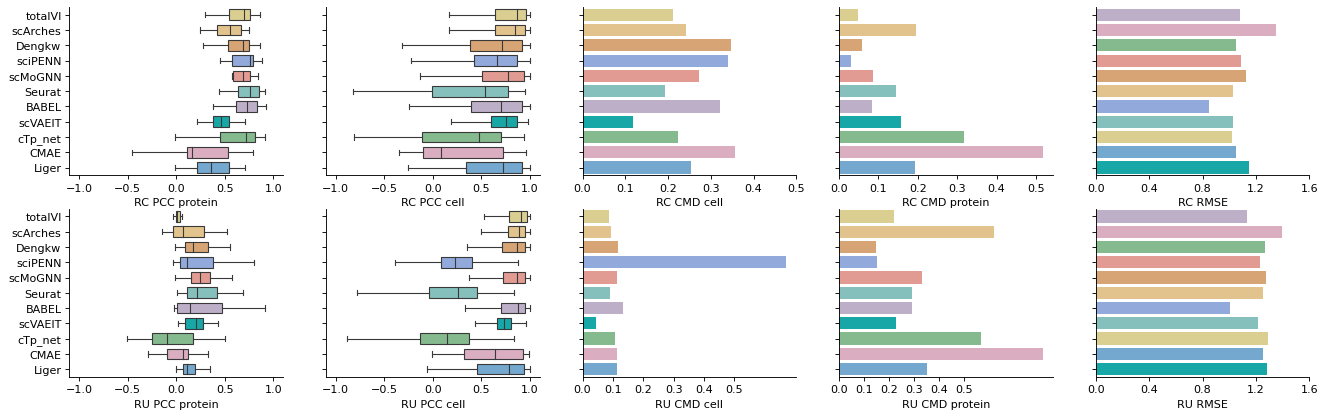

In [101]:
font = {'family':'DejaVu Sans','weight':'normal','size':15}
plt.figure(figsize=(20,6), dpi= 80)

ax1 = plt.subplot(251)
ax1 = sns.boxplot(data=RC_PCC_protein.T,orient = "h",linewidth=1,width=0.7, palette=my_pal,fliersize=0,flierprops = {'marker':'o'})
ax1.set_xlabel("RC PCC protein")
ax1.set_xlim(-1.1,1.1)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

ax2 = plt.subplot(252)
ax2 = sns.boxplot(data=RC_PCC_cell.T,orient = "h",linewidth=1,width=0.7, palette=my_pal,fliersize=0,flierprops = {'marker':'o'})
ax2.set_xlabel("RC PCC cell")
ax2.set_xlim(-1.1,1.1)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
plt.yticks(alpha=0)

ax3 = plt.subplot(253)
ax3 = sns.barplot(x = "cmd_values",y = RC_CMD_cell.index,orient = "h",data = RC_CMD_cell, ci = 95, palette = my_pal)
ax3.set_xlabel("RC CMD cell")
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.set_xticks(np.arange(0,0.55,0.1))
plt.yticks(alpha=0)

ax4 = plt.subplot(254)
ax4 = sns.barplot(x = "cmd_values",y = RC_CMD_protein.index,orient = "h",data = RC_CMD_protein, ci = 95, palette = my_pal)
ax4.set_xlabel("RC CMD protein")
ax4.spines['top'].set_visible(False)
ax4.spines['right'].set_visible(False)
ax4.set_xticks(np.arange(0,0.55,0.1))
plt.yticks(alpha=0)

ax5 = plt.subplot(255)
ax5 = sns.barplot(x = "rmse_values",y = RC_RMSE_Data.index,orient = "h",data = RC_RMSE_Data, ci = 95, palette = my_pal)
ax5.set_xlabel("RC RMSE")
ax5.spines['top'].set_visible(False)
ax5.spines['right'].set_visible(False)
ax5.set_xticks(np.arange(0,2,0.4))
plt.yticks(alpha=0)

ax6 = plt.subplot(256)
ax6 = sns.boxplot(data=RU_PCC_protein.T,orient = "h",linewidth=1,width=0.7, palette=my_pal,fliersize=0,flierprops = {'marker':'o'})
ax6.set_xlabel("RU PCC protein")
ax6.set_xlim(-1.1,1.1)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)

ax7 = plt.subplot(257)
ax7 = sns.boxplot(data=RU_PCC_cell.T,orient = "h",linewidth=1,width=0.7, palette=my_pal,fliersize=0,flierprops = {'marker':'o'})
ax7.set_xlabel("RU PCC cell")
ax7.set_xlim(-1.1,1.1)
ax7.spines['top'].set_visible(False)
ax7.spines['right'].set_visible(False)
plt.yticks(alpha=0)

ax8 = plt.subplot(258)
ax8 = sns.barplot(x = "cmd_values",y = RU_CMD_cell.index,orient = "h",data = RU_CMD_cell, ci = 95, palette = my_pal)
ax8.set_xlabel("RU CMD cell")
ax8.spines['top'].set_visible(False)
ax8.spines['right'].set_visible(False)
# ax3.set_xticks(np.arange(0,0.35,0.05))
ax8.set_xticks(np.arange(0,0.55,0.1))
plt.yticks(alpha=0)

ax9 = plt.subplot(259)
ax9 = sns.barplot(x = "cmd_values",y = RU_CMD_protein.index,orient = "h",data = RU_CMD_protein, ci = 95, palette = my_pal)
ax9.set_xlabel("RU CMD protein")
ax9.spines['top'].set_visible(False)
ax9.spines['right'].set_visible(False)
ax9.set_xticks(np.arange(0,0.55,0.1))
plt.yticks(alpha=0)

ax10 = plt.subplot(2,5,10)
ax10 = sns.barplot(x = "rmse_values",y = RU_RMSE_Data.index,orient = "h",data = RU_RMSE_Data, ci = 95, palette = my_pal)
ax10.set_xlabel("RU RMSE")
ax10.spines['top'].set_visible(False)
ax10.spines['right'].set_visible(False)
ax10.set_xticks(np.arange(0,2,0.4))
plt.yticks(alpha=0)

# plt.savefig(test_id + "_from_" + train_id +"_RC_RU.pdf", bbox_inches="tight")
plt.show()